In [132]:
!pip install cmasher
!pip install jupyter-dash
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import cmasher as cmr
import umap.umap_ as umap
from itertools import product
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [4]:
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Data preparation


In [5]:
df_descriptors = pd.read_csv('/content/descriptors_df.csv')
df_names = pd.read_csv('/content/df_names.csv')
df = pd.merge(df_names, df_descriptors, on='normalised_name', how='left')


In [8]:
df_common = pd.read_csv('/content/df_1.csv')
df_full = pd.merge(df_common, df, on='Name', how='left').drop('normalised_name_x', axis=1)

In [10]:
df_full['Date'] = pd.to_datetime(df_full['Date'])
df_full = df_full.dropna(subset=['NumHeavyAtoms'])

In [12]:
def to_num(x):
  try:
    return float(x)
  except:
    return None

df_full['raw_value'] = df_full['raw_value'].apply(to_num)

# Task 1

**Create at least 3 different types of statistical plots and 1 interactive plot to analyze your data. Use seaborn and plotly to visualize them. Draw conclusions and explain why the graphs are useful for analyzing your data.**

Count/NumHeavyAtoms 

Count/Bond Acceptor

Count/Bond Donors

Count/MolecularWeight

У нас часто повторяются какие-то соединения, можно сравнить одно значение для тех, кто часто встречается. И по типу измерения.  Бокс плоты


The first thing we can look at is the index of refraction. Its distribution. As you can see, we have a large tail of large values and a left-shifted distribution

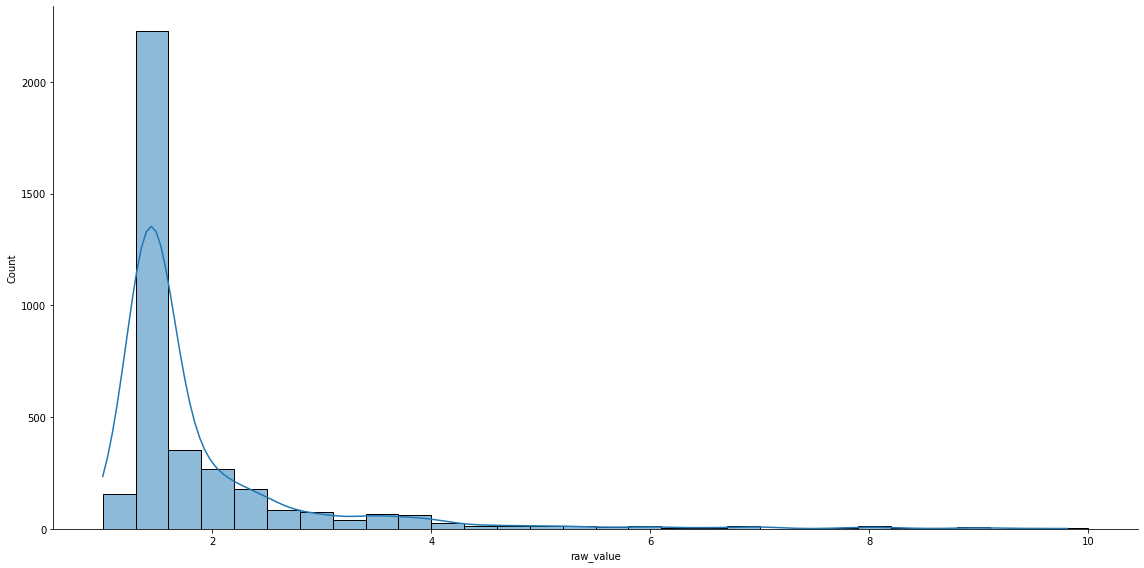

In [85]:
sns.displot(data=df_full, x='raw_value', kde=True, binwidth=0.3, height=8, aspect=2,)
plt.show()

For the sake of interest, you can look at some parameters among the descriptors.

In [87]:
list(df_full.columns)

['DOI',
 'Date',
 'Journal',
 'Title',
 'Name',
 'measurement_error',
 'measurement_wavelength',
 'measurement_method',
 'raw_value',
 'specifier',
 'normalised_name_y',
 'check_smiles',
 'exactmw',
 'amw',
 'lipinskiHBA',
 'lipinskiHBD',
 'NumRotatableBonds_x',
 'NumHBD',
 'NumHBA',
 'NumHeavyAtoms',
 'NumAtoms',
 'NumHeteroatoms_x',
 'NumAmideBonds',
 'FractionCSP3_x',
 'NumRings',
 'NumAromaticRings_x',
 'NumAliphaticRings_x',
 'NumSaturatedRings_x',
 'NumHeterocycles',
 'NumAromaticHeterocycles_x',
 'NumSaturatedHeterocycles_x',
 'NumAliphaticHeterocycles_x',
 'NumSpiroAtoms',
 'NumBridgeheadAtoms',
 'NumAtomStereoCenters',
 'NumUnspecifiedAtomStereoCenters',
 'labuteASA',
 'tpsa',
 'CrippenClogP',
 'CrippenMR',
 'chi0v',
 'chi1v',
 'chi2v',
 'chi3v',
 'chi4v',
 'chi0n',
 'chi1n',
 'chi2n',
 'chi3n',
 'chi4n',
 'hallKierAlpha',
 'kappa1',
 'kappa2',
 'kappa3',
 'Phi',
 'MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolW

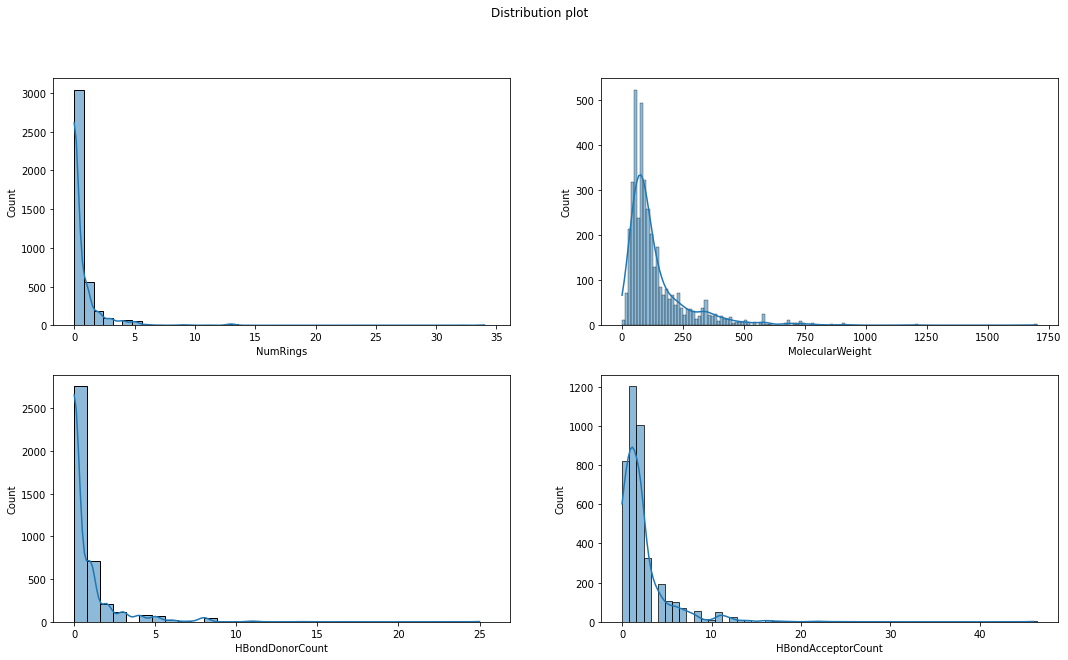

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Distribution plot')
sns.histplot(ax=axes[0, 0], data=df_full, x='NumRings', kde=True, binwidth=0.8)
sns.histplot(ax=axes[0, 1], data=df_full, x='MolecularWeight', kde=True)
sns.histplot(ax=axes[1, 0], data=df_full, x='HBondDonorCount', kde=True, binwidth=0.8)
sns.histplot(ax=axes[1, 1], data=df_full, x='HBondAcceptorCount', kde=True, binwidth=0.8)
plt.show()

It's interesting that these distribution are same refractive index distribution. We also have left-shift and heavy tail.

Also in original dataset refractive index was measured by several methods, we can see them in the pie chart. 

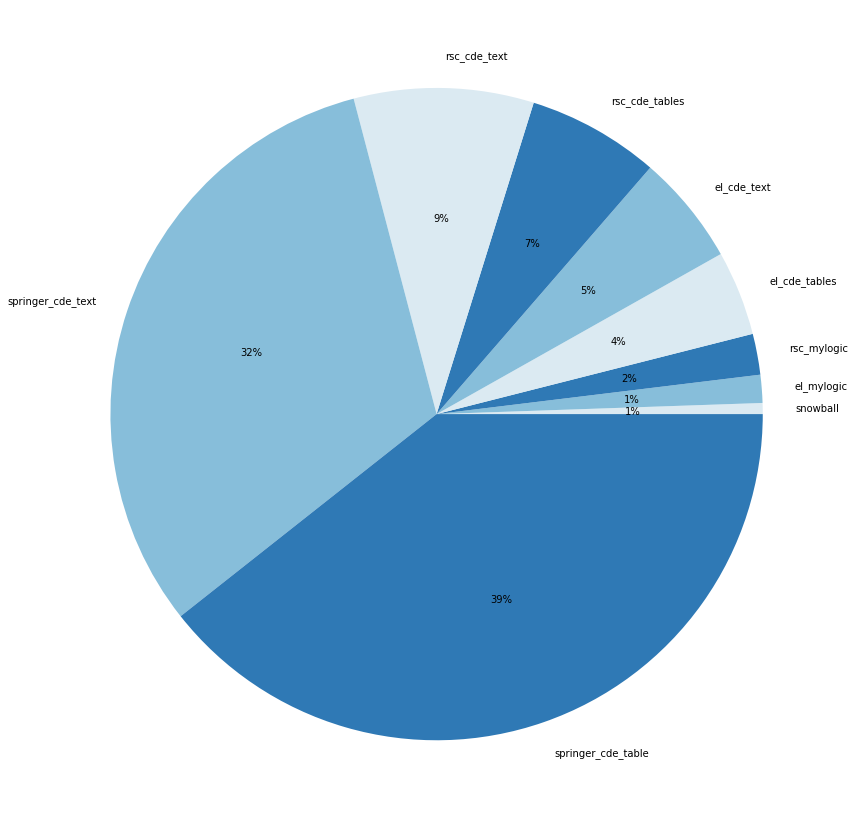

In [17]:
fig = plt.figure(figsize=(15,15))

count = list(df_full.groupby(['measurement_method'])['measurement_method'].count().sort_values())
colors = sns.color_palette('RdBu')[3:6]
label = list(df_full['measurement_method'].unique())
plt.pie(count, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

For interactive plot we can investigate some dependencies between descriptors, which are obviosly not the same parameters of molecules. For example 

In [126]:
fig = px.scatter(df_full, x="NumHeavyAtoms", y="NumValenceElectrons", hover_name="Name")

app = JupyterDash(__name__)

app.layout = html.Div([dcc.Graph(figure=fig)])

app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

In [ ]:
# descriptors_df = pd.merge(descriptors_df, descriptors_mor.drop_duplicates(subset=['normalised_name']), on='normalised_name', how='left')

# Task 2

**Perform statistical tests for one categorical variable and multiple numeric descriptors. Draw conclusions and interpret your results.**

Let's analyze refraction index mesarement method. Ia there difference between them?

In [133]:
df_stat = df_full.dropna(subset=['measurement_method', 'raw_value'])

Check distribution for index, we remember that it left-shifted and has heavy tail. But Shapiro test shows that it's normal.

In [134]:
data = df_stat.loc[:,'raw_value']
stat, p = shapiro(data)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.563, p=0.563
Probably not Gaussian


If we compare just two methods, we can see that is no difference here

In [79]:
data1 = df_stat[(df_stat.measurement_method == 'rsc_cde_text')]['raw_value']
data2 = df_stat[(df_stat.measurement_method == 'springer_cde_text')]['raw_value']
stat, p = ttest_ind(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.637, p=0.637
Probably the same distribution


Also it's the same for 3 methods.

In [80]:
data1 = df_stat[(df_stat.measurement_method == 'el_cde_text')]['raw_value']
data2 = df_stat[(df_stat.measurement_method == 'springer_cde_text')]['raw_value']
data3 = df_stat[(df_stat.measurement_method == 'rsc_cde_text')]['raw_value']
stat, p = f_oneway(data1, data2, data3)
print('stat={0:.3g}, p={0:.3g}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=2.36, p=2.36
Probably the same distribution


# Task 3

**Calculate correlation coefficients for your dataset and investigate multicollinearity. Visualize and interpret your results.**

In our dataset we have a lot of descriptors, for visualization we use first few. In interactive heatmap ypu can in zoom and see value of coeffisients more clearly 

In [20]:
df_corr = df_full.select_dtypes(include = ['float', 'int']).corr()

In [26]:
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}',
        colorscale = 'Viridis'
    )
)
fig.update_layout(
    autosize=False,
    width=1200,
    height=1200,)
app = JupyterDash(__name__)

app.layout = html.Div([dcc.Graph(figure=fig)])

app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

# Task 4

**Choose one linear (except PCA) and one non-linear dimension reduction method. Run them on your data. It is preferable to use seaborn and plotly to visualize results. Justify the choice of the number of components / dimensions and explain them**

## Linear


## Non-linear

In [ ]:
# UMAP, Kernel PCA, t-SNE, Autoencoder

In [28]:
df_mor = pd.read_csv('/content/descriptors_mor.csv')
df_all = pd.merge(df_full.rename(columns={'normalised_name_y': 'normalised_name'}), df_mor.drop_duplicates(subset=['normalised_name']), on='normalised_name', how='left')

<ipython-input-28-594eb71b2bbc>:1: DtypeWarning:

Columns (71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,170,179,215,224,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,386,395,431,440,834,850,851,855,856,858,859,863,864) have mixed types. Specify dtype option on import or set low_memory=False.



In [142]:
distances = ['minkowski', 'euclidean', 'manhattan']
neighbors = [50, 100, 150]
min_dist = [0.0, 0.3, 0.5]

In [139]:
df = df_all.select_dtypes(include = ['float', 'int']).replace([np.inf, -np.inf], np.nan)
df = df.fillna(a.mean())

In [140]:
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)

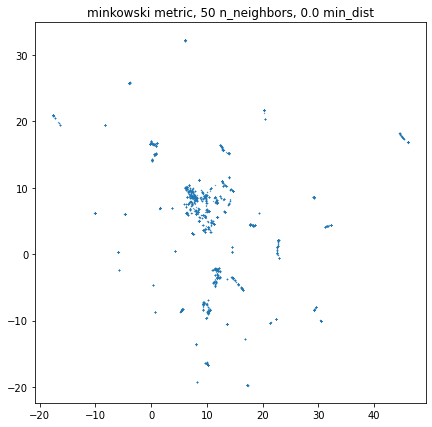

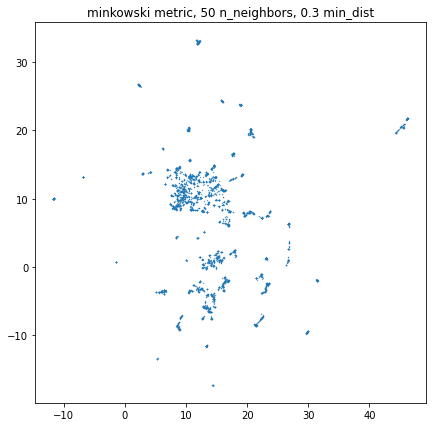

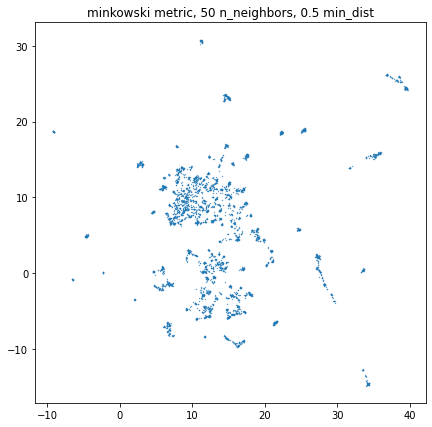

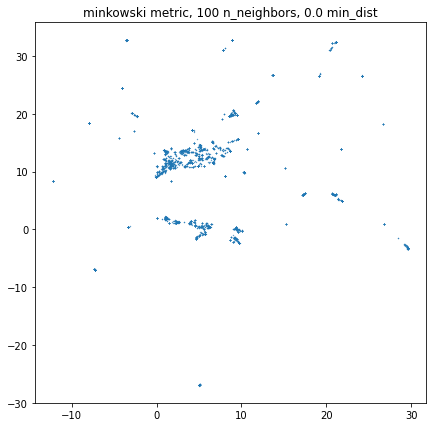

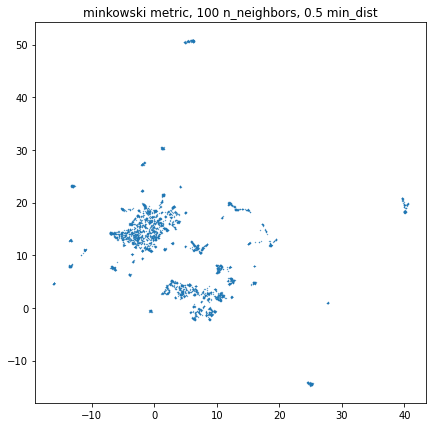

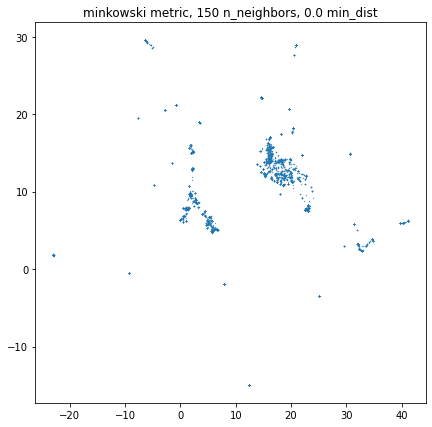

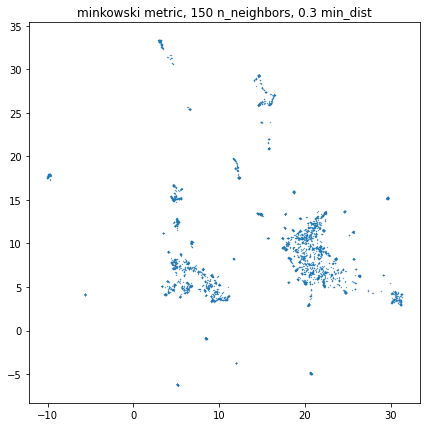

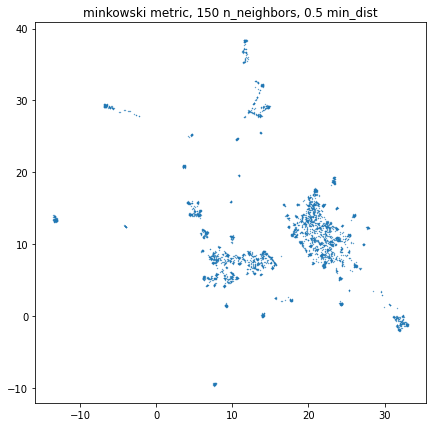

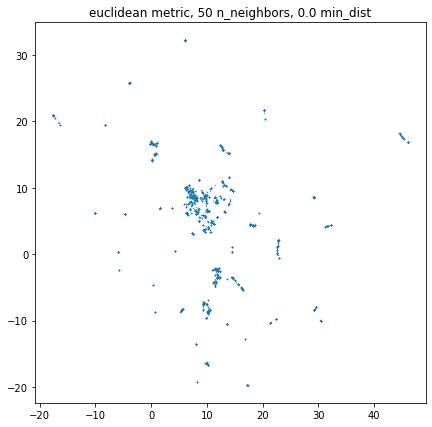

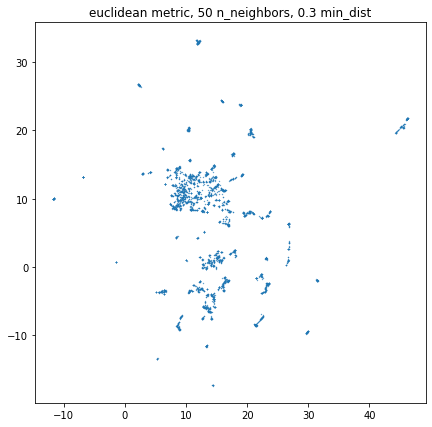

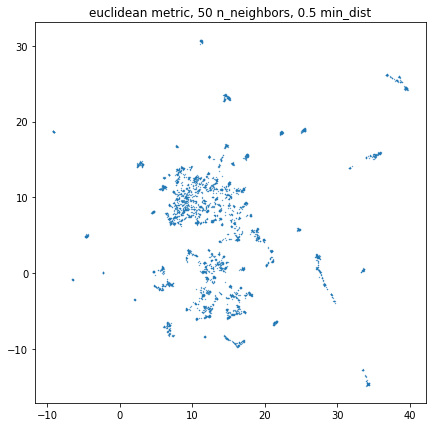

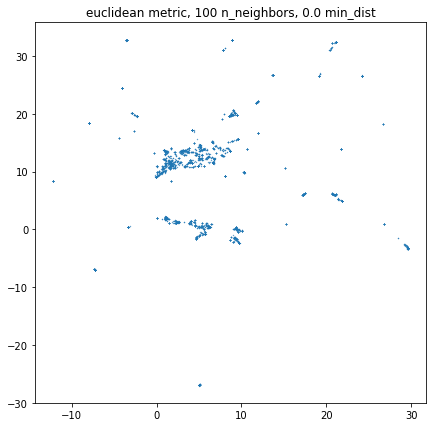

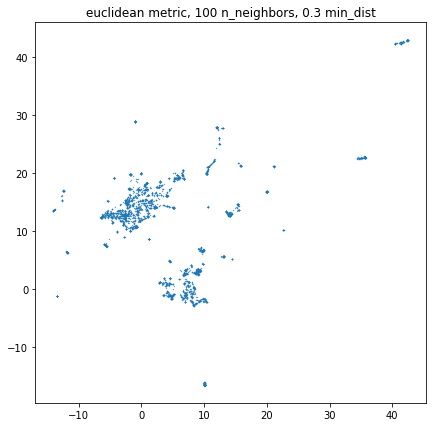

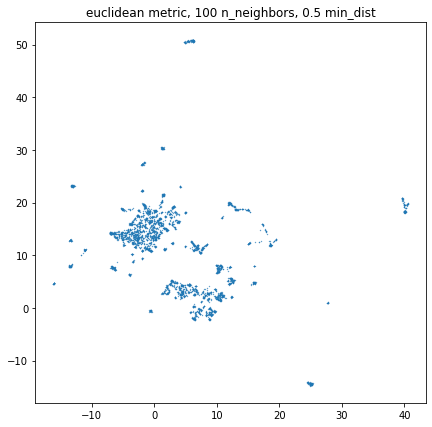

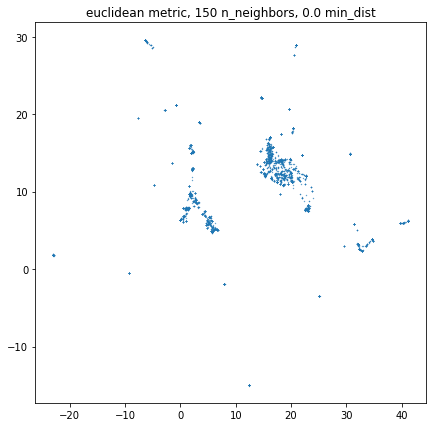

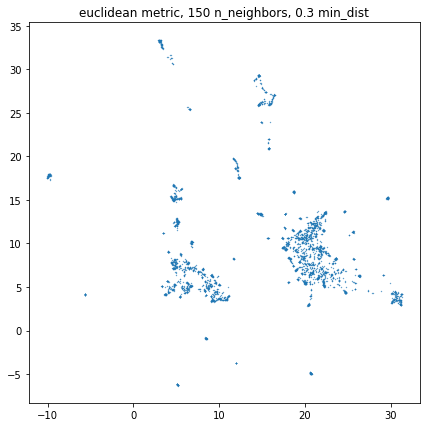

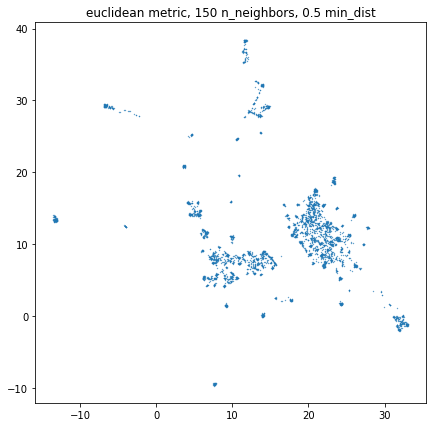

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



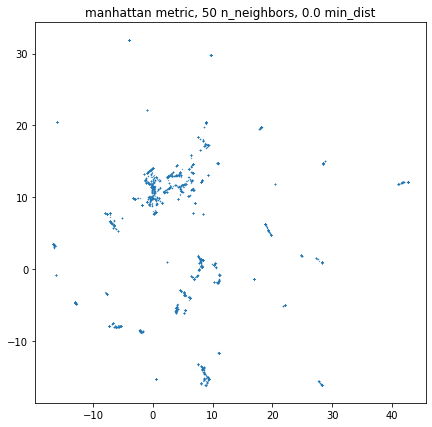

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



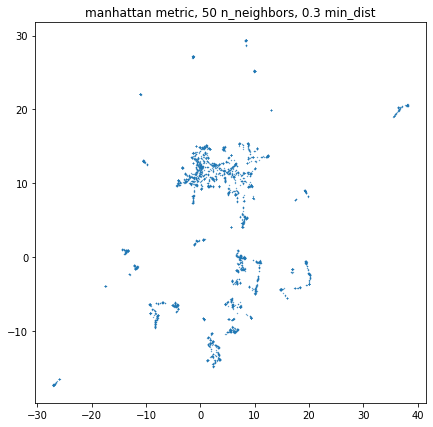

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



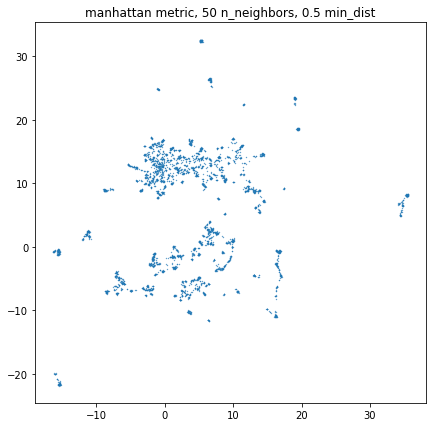

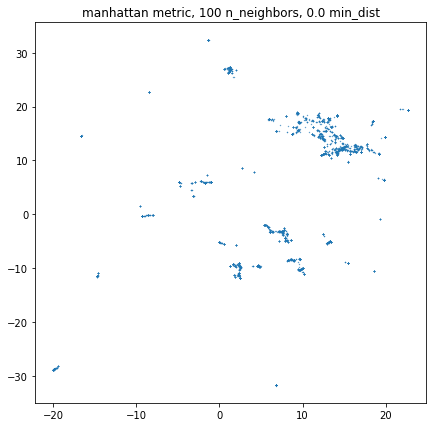

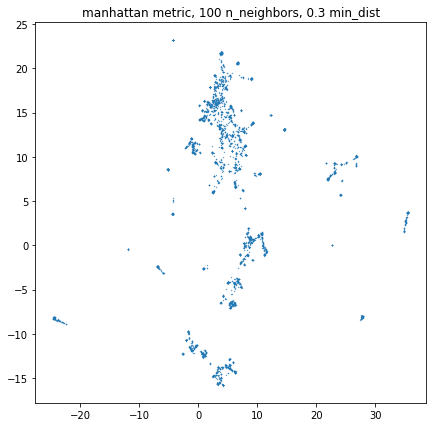

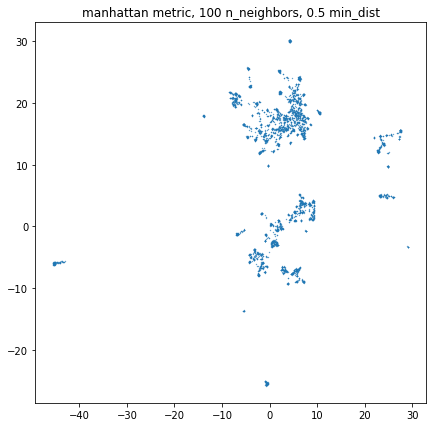

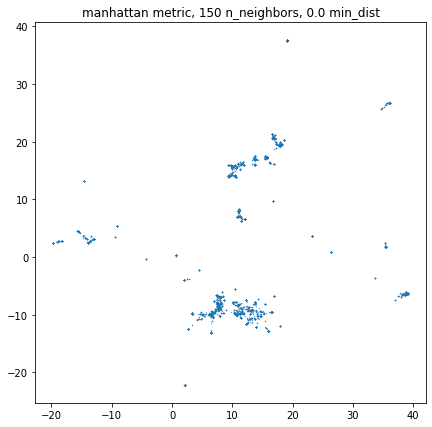

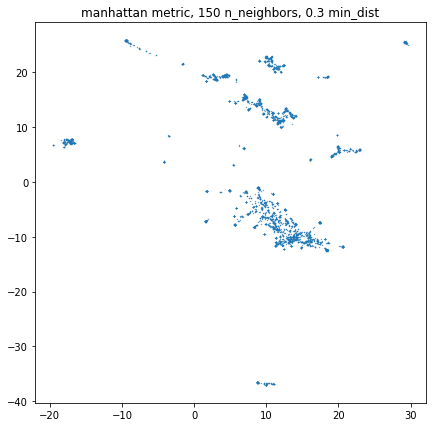

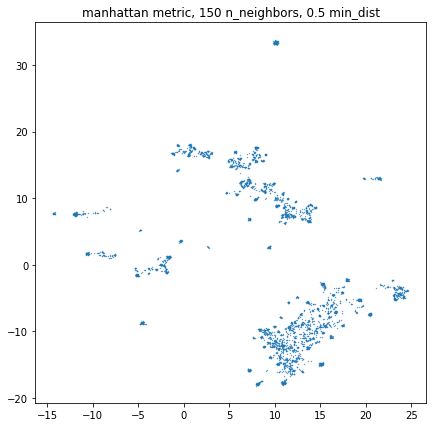

In [143]:
for dist, neigh, min_d in product(distances, neighbors, min_dist):
    clusterable_embedding = umap.UMAP(
        n_neighbors=neigh,
        min_dist=min_d, 
        n_components=2,
        random_state=42,
        metric=dist,
    ).fit_transform(df_scale)
    
    fig, axs = plt.subplots(figsize=(7, 7))
    plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=0.1, cmap='Spectral')
    plt.title(f'{dist} metric, {neigh} n_neighbors, {min_d} min_dist')
    plt.show()